<h1>Import libraries</h1>

In [20]:
import yfinance as yf
import pandas as pd
import time 
import requests
from bs4 import BeautifulSoup

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])

<h1> Webscraping and sector analysis </h1>

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue'

In [5]:
data = requests.get(url).text
soup = BeautifulSoup(data,'html5lib')

In [6]:
#Revenue o&g companies

df= pd.DataFrame(columns=['Country', 'Company Name','2017','2018','2019','2020'])

table = soup.find_all('table')
        
rows = table[1].find_all('tr')
    
for row in rows:
            
    col = row.find_all('td')
            
    if col != []:
                
        country = col[0].text.strip()
        name = col[1].text.strip()
        revenue2017 = col[2].text.split('[')[0]
        revenue2018 = col[3].text.split('[')[0]
        revenue2019 = col[4].text.split('[')[0]
        revenue2020 = col[5].text.split('[')[0]
                
        if (revenue2017!= 0)& (revenue2018!= 0)&(revenue2019!= 0)&(revenue2020!= 0):
                
            df = df.append({'Country':country, 'Company Name':name,'2017':revenue2017,'2018':revenue2018,'2019':revenue2019,'2020':revenue2020 }, ignore_index=True)
            

In [7]:
df.head(50)

,Country,Company Name,2017,2018,2019,2020
0,Algeria,Sonatrach,33.2,30.3,33.0,20.0
1,Austria,OMV Group,22.8,27.9,26.2,18.9
2,Azerbaijan,SOCAR,53.8,65.3,49.1,23.2
3,Brazil,Petrobras,77.8,84.6,76.5,53.6
4,Canada,Suncor Energy,25.3,30.5,30.0,18.5
5,China,China National Offshore Oil,65.8,81.4,108.1,108.6
6,China,China National Petroleum Corporation,262.5,326.0,393.0,379.1
7,Colombia,Ecopetrol,16.7,20.5,21.4,15.0
8,France,Engie,59.6,57.0,60.1,44.3
9,France,Schlumberger,21.9,24.2,32.9,23.6


In [8]:
df.set_index('Company Name', inplace=True)

In [9]:
df.drop(index=['PDVSA','National Iranian Oil Company','Petronas'],columns = 'Country',inplace=True)

In [11]:
# convert all columns of DataFrame
df = df.apply(pd.to_numeric) # convert all columns of DataFrame

In [12]:
years = list(map(str, range(2017, 2021)))

In [13]:
#BP and Shell are good examples of integrated oil and gas companies headquartered in UK as our thesis of investment
#but 1000 times bigger than Kistos.

bp = df.loc['BP',years]
shell =df.loc['Shell plc',years]

In [17]:
#https://www.statista.com/statistics/262860/uk-brent-crude-oil-price-changes-since-1976/

brent_average_price = [54.25, 71.34, 64.3, 41.96]

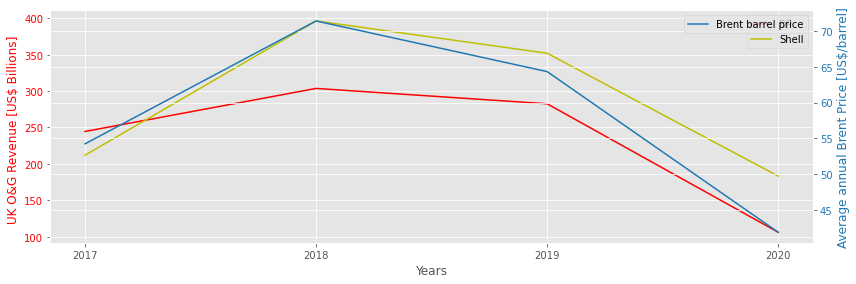

In [33]:
fig, ax1 = plt.subplots()

color_bp = 'r'
color_shell= 'y'
ax1.set_xlabel('Years')
ax1.set_ylabel('UK O&G Revenue [US$ Billions] ', color=color_bp)
ax1.plot(years,bp, color=color_bp, label= 'BP')
ax1.plot(years,shell, color=color_shell, label='Shell')
ax1.tick_params(axis='y', labelcolor=color_bp)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average annual Brent Price [US$/barrel]', color=color)  # we already handled the x-label with ax1
ax2.plot(years,brent_average_price,color=color, label = 'Brent barrel price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rcParams["figure.figsize"] = (12,4)
plt.show()

<body> First of all, it is shown a huge correlation between the annual revenue,  Brent oil and Natural Gas. Therefore, it is proven that the cycle of oil is crucial in our thesis.
    
    
The oil and gas industry is known to be very capital intensive and highly dependent on government decisions. In addition, the industry faces many controversies that make oil and gas a high-risk investment.  
    
For example:   
<ul>   
    <li>Environmental impact, such as water, natural habitats, and air quality</li>
    <li>Impact on climate change</li>
    <li>Oil spills and leaks</li>
    <li>Overuse and over-reliance on fossil fuels</li>
    
</ul>    
    
On the other hand:
    
<ul>
    <li>The market penetration of electric vehicles has not led to significant changes in oil demand.</li>
    <li>Europe's high dependence on Russian gas makes European gas more important than ever.</li>
    
</ul>    
    
An exceptional situation is occurring, Europe is facing a new extraordinary situation with gas prices accelerating Kistos' growth without going into debt. Therefore, an investment in the oil and gas industry could be worthwhile from a profit and risk point of view.

 </body>

<h2 class="red-text" style="color: red;" > Note that 2020 was the year of the first wave of COVID and the world stood still for months. Data source: Eurostat</h2>

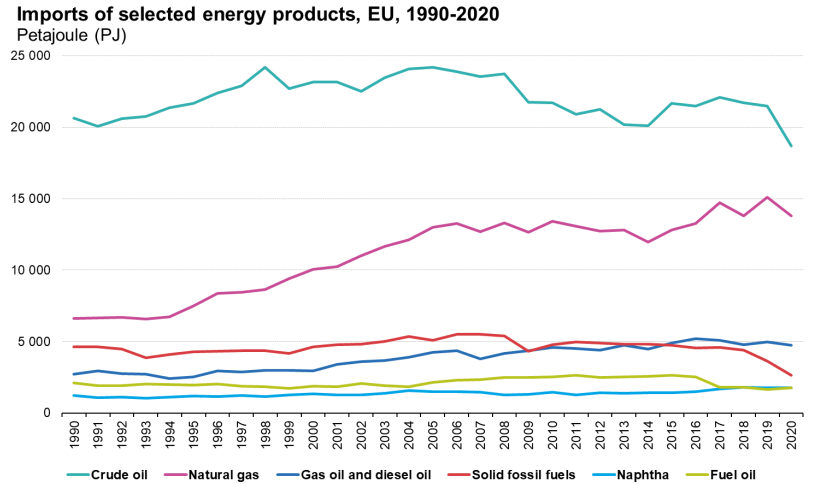

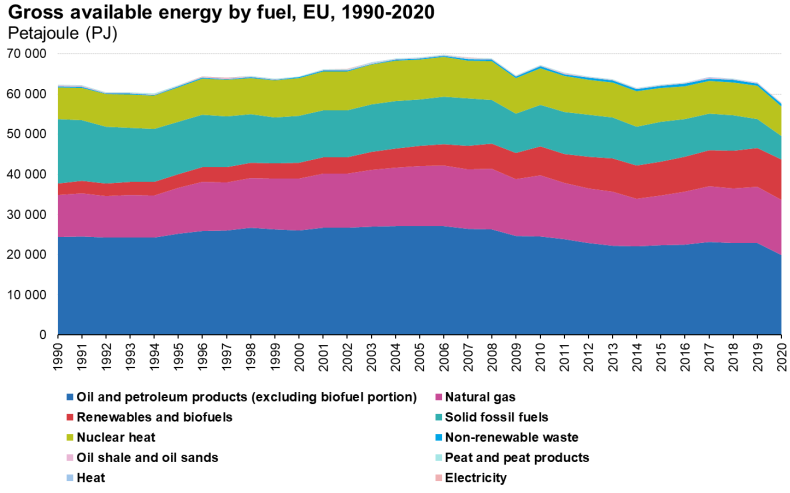

<h1> Dutch TTF natural gas figures </h1>

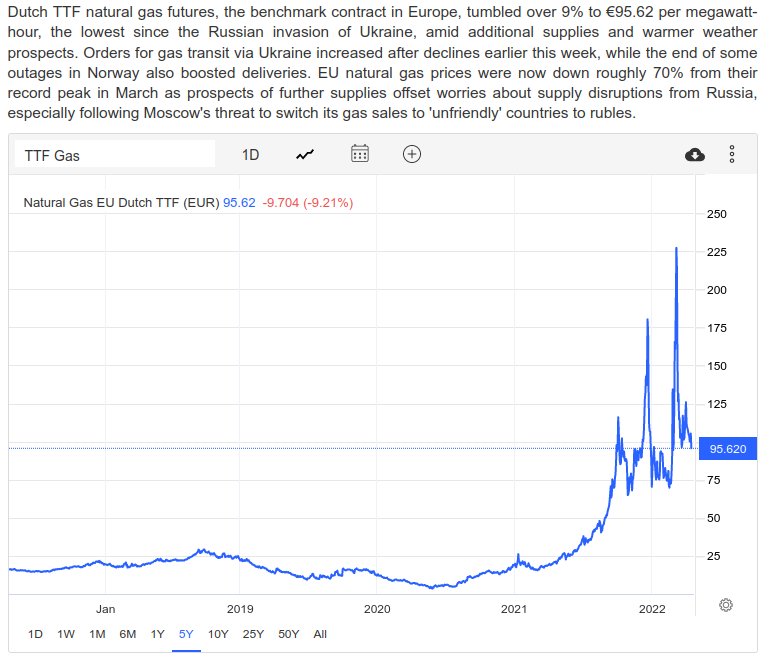

<h2>01-01-2017 to 31-12-2020 EU Natural Gas Chart</h2>

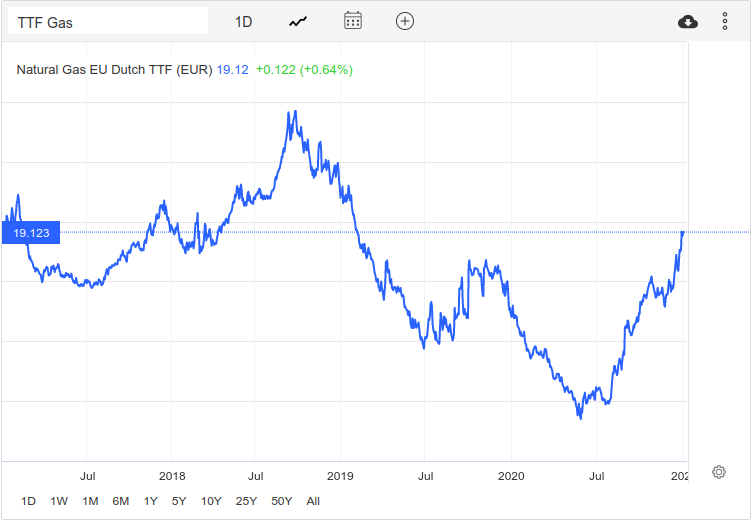

<h1>Stock Fundamentals Analysis using Finance Modeling Prep API</h1>

In [22]:
api_key = open('fmp_key','r').read().strip()

Occidental Petroleum and Devon Energy are the best examples of Upstream oil and gas companies. In fact, Warren Buffet has recently invested in Occidental Petroleum, so it is a good example to look at.

In [62]:
company = 'OXY'

#data I want to process

lindex = ['evToFreeCashFlow','freeCashFlowYield','debtRatio','currentRatio','interestCoverage','cashFlowToDebtRatio',
         'totalCurrentAssets','totalNonCurrentAssets','totalEquity','totalCurrentLiabilities','totalNonCurrentLiabilities',
         'freeCashFlowGrowth','revenueGrowth','epsgrowth','peRatio','pfcfRatio','pbRatio','enterpriseValueMultiple',
         'grossProfitMargin','operatingProfitMargin','pretaxProfitMargin','netProfitMargin','returnOnAssets','returnOnEquity',
         'payoutRatio','dividendYield']

df_OXY = pd.DataFrame(index = lindex, columns = ['2021','2020','2019','2018','2017'])

#df_DVN = pd.DataFrame(columns = ['2021','2020','2019','2018','2017'])

years = list(map(str, range(2017, 2022)))

years.reverse()

#Maximum historical data with the Free Plan.

nyears = 5
    
#Data Collection
balance_sheet_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={nyears}&apikey={api_key}')
    
ratios_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/ratios/{company}?limit={nyears}&apikey={api_key}')
    
key_metrics_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?limit={nyears}&apikey={api_key}')

financial_growth_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?limit={nyears}&apikey={api_key}')
    
balance_sheet_statement = balance_sheet_response.json()
    
ratios = ratios_response.json()
    
key_metrics = key_metrics_response.json()

financial_growth = financial_growth_response.json()  
    
    
    #-------------------------------------------------------
    
    
for i in range(nyears):
    
    
    # df.loc['rowName or index '][ column -- years[0]]
    
    #Companies that perform better during the recession have high free cash flow (low Capex).
        
    df_OXY.loc['evToFreeCashFlow'][years[i]]  = key_metrics[i]['evToFreeCashFlow']
    df_OXY.loc['freeCashFlowYield'][years[i]] = key_metrics[i]['freeCashFlowYield']
        
        #Companies that perform better in times of rising interest rates are not leveraged.
        
            #TotalLiabilities / TotalAssets  = TotalLiabilities / TotalEquity + TotalLiabilities
            
    df_OXY.loc['debtRatio'][years[i]]=ratios[i]['debtRatio']
    df_OXY.loc['currentRatio'][years[i]]=ratios[i]['currentRatio']
    # interest coverage:the minimum acceptable is 2, Analysts prefer to see a coverage ratio of 3 or better (Investopedia)
    df_OXY.loc['interestCoverage'][years[i]]= ratios[i]['interestCoverage']
    df_OXY.loc['cashFlowToDebtRatio'][years[i]]=ratios[i]['cashFlowToDebtRatio']
        
        #Financial Statements evolution
        
    df_OXY.loc['totalCurrentAssets'][years[i]]=balance_sheet_statement[i]['totalCurrentAssets']
    df_OXY.loc['totalNonCurrentAssets'][years[i]]=balance_sheet_statement[i]['totalNonCurrentAssets']
        
    df_OXY.loc['totalEquity'][years[i]]=balance_sheet_statement[i]['totalEquity']
        
    df_OXY.loc['totalCurrentLiabilities'][years[i]]=balance_sheet_statement[i]['totalCurrentLiabilities']
    df_OXY.loc['totalNonCurrentLiabilities'][years[i]]=balance_sheet_statement[i]['totalNonCurrentLiabilities']
            
        #Financial Growth
        
    df_OXY.loc['freeCashFlowGrowth'][years[i]]= financial_growth[i]['freeCashFlowGrowth']
    df_OXY.loc['revenueGrowth'][years[i]]= financial_growth[i]['revenueGrowth']
    df_OXY.loc['epsgrowth'][years[i]]= financial_growth[i]['epsgrowth']
        
        #Financial Ratios
        
    df_OXY.loc['peRatio'][years[i]] = key_metrics[i]['peRatio']
    df_OXY.loc['pfcfRatio'][years[i]]= key_metrics[i]['pfcfRatio']
    df_OXY.loc['pbRatio'][years[i]]= key_metrics[i]['pbRatio']
    #EV/EBITDA
    df_OXY.loc['enterpriseValueMultiple'][years[i]]=ratios[i]['enterpriseValueMultiple']
        
        #Profitability
    df_OXY.loc['grossProfitMargin'][years[i]] = ratios[i]['grossProfitMargin']
    df_OXY.loc['operatingProfitMargin'][years[i]]=ratios[i]['operatingProfitMargin']
    df_OXY.loc['pretaxProfitMargin'][years[i]]=ratios[i]['pretaxProfitMargin']
    df_OXY.loc['netProfitMargin'][years[i]]=ratios[i]['netProfitMargin']
        
        #Management
        
    df_OXY.loc['returnOnAssets'][years[i]]=ratios[i]['returnOnAssets']
    df_OXY.loc['returnOnEquity'][years[i]]=ratios[i]['returnOnEquity']
        
        #Dividends
        
    df_OXY.loc['payoutRatio'][years[i]]=ratios[i]['payoutRatio']
    df_OXY.loc['dividendYield'][years[i]]=ratios[i]['dividendYield']  
        

In [63]:
df_OXY

,2021,2020,2019,2018,2017
evToFreeCashFlow,8.111155,59.622776,94.629546,21.205911,43.024936
freeCashFlowYield,0.221958,0.04889,0.022461,0.05389,0.026556
debtRatio,0.729103,0.768023,0.686893,0.513613,0.510494
currentRatio,1.226694,1.07248,1.249649,1.339989,1.117568
interestCoverage,2.890335,-0.883427,2.640713,13.154242,3.173913
cashFlowToDebtRatio,0.343359,0.106035,0.184324,0.743336,0.508344
totalCurrentAssets,10211000000,8819000000,18681000000,9932000000,8270000000
totalNonCurrentAssets,64825000000,71245000000,90649000000,33922000000,33756000000
totalEquity,20327000000,18573000000,34232000000,21330000000,20572000000
totalCurrentLiabilities,8324000000,8223000000,14949000000,7412000000,7400000000


In [64]:
key_metrics[0]['date']

'2021-12-31'

In [65]:
ratios[0]['date']

'2021-12-31'

In [67]:
balance_sheet_statement[0]['date']

'2021-12-31'

In [68]:
financial_growth[0]['date']

'2021-12-31'

In [71]:
df_OXY.to_excel('01052022_df_OXY.xlsx')

In [74]:
company = 'DVN'

lindex = ['evToFreeCashFlow','freeCashFlowYield','debtRatio','currentRatio','interestCoverage','cashFlowToDebtRatio',
         'totalCurrentAssets','totalNonCurrentAssets','totalEquity','totalCurrentLiabilities','totalNonCurrentLiabilities',
         'freeCashFlowGrowth','revenueGrowth','epsgrowth','peRatio','pfcfRatio','pbRatio','enterpriseValueMultiple',
         'grossProfitMargin','operatingProfitMargin','pretaxProfitMargin','netProfitMargin','returnOnAssets','returnOnEquity',
         'payoutRatio','dividendYield']

df_DVN = pd.DataFrame(index=lindex, columns = ['2021','2020','2019','2018','2017'])

years = list(map(str, range(2017, 2022)))

years.reverse()

nyears = 5
    
#Data Collection

balance_sheet_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={nyears}&apikey={api_key}')
    
ratios_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/ratios/{company}?limit={nyears}&apikey={api_key}')
    
key_metrics_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?limit={nyears}&apikey={api_key}')

financial_growth_response = requests.get(
    f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?limit={nyears}&apikey={api_key}')
    
balance_sheet_statement = balance_sheet_response.json()
    
ratios = ratios_response.json()
    
key_metrics = key_metrics_response.json()
    
financial_growth = financial_growth_response.json()  
    
    
    #-------------------------------------------------------
    
    
for i in range(nyears):
    
    # df.loc['rowName or index '][ column -- years[0]]
    
    #Companies that perform better during the recession have high free cash flow (low Capex).
        
    df_DVN.loc['evToFreeCashFlow'][years[i]]=key_metrics[i]['evToFreeCashFlow']
    df_DVN.loc['freeCashFlowYield'][years[i]]=key_metrics[i]['freeCashFlowYield']
        
        #Companies that perform better in times of rising interest rates are not leveraged.
        
            #TotalLiabilities / TotalAssets  = TotalLiabilities / TotalEquity + TotalLiabilities
            
    df_DVN.loc['debtRatio'][years[i]]=ratios[i]['debtRatio']
    df_DVN.loc['currentRatio'][years[i]]=ratios[i]['currentRatio']
    df_DVN.loc['interestCoverage'][years[i]]= ratios[i]['interestCoverage']
    df_DVN.loc['cashFlowToDebtRatio'][years[i]]=ratios[i]['cashFlowToDebtRatio']
        
        #Financial Statements evolution
        
    df_DVN.loc['totalCurrentAssets'][years[i]]=balance_sheet_statement[i]['totalCurrentAssets']
    df_DVN.loc['totalNonCurrentAssets'][years[i]]=balance_sheet_statement[i]['totalNonCurrentAssets']
        
    df_DVN.loc['totalEquity'][years[i]]=balance_sheet_statement[i]['totalEquity']
        
    df_DVN.loc['totalCurrentLiabilities'][years[i]]=balance_sheet_statement[i]['totalCurrentLiabilities']
    df_DVN.loc['totalNonCurrentLiabilities'][years[i]]=balance_sheet_statement[i]['totalNonCurrentLiabilities']
            
        #Financial Growth
        
    df_DVN.loc['freeCashFlowGrowth'][years[i]]= financial_growth[i]['freeCashFlowGrowth']
    df_DVN.loc['revenueGrowth'][years[i]]= financial_growth[i]['revenueGrowth']
    df_DVN.loc['epsgrowth'][years[i]]= financial_growth[i]['epsgrowth']
        
        #Financial Ratios
        
    df_DVN.loc['peRatio'][years[i]] = key_metrics[i]['peRatio']
    df_DVN.loc['pfcfRatio'][years[i]]= key_metrics[i]['pfcfRatio']
    df_DVN.loc['pbRatio'][years[i]]= key_metrics[i]['pbRatio']
    df_DVN.loc['enterpriseValueMultiple'][years[i]]=ratios[i]['enterpriseValueMultiple']
        
        #Profitability
    df_DVN.loc['grossProfitMargin'][years[i]] = ratios[i]['grossProfitMargin']
    df_DVN.loc['operatingProfitMargin'][years[i]]=ratios[i]['operatingProfitMargin']
    df_DVN.loc['pretaxProfitMargin'][years[i]]=ratios[i]['pretaxProfitMargin']
    df_DVN.loc['netProfitMargin'][years[i]]=ratios[i]['netProfitMargin']
        
        #Management
        
    df_DVN.loc['returnOnAssets'][years[i]]=ratios[i]['returnOnAssets']
    df_DVN.loc['returnOnEquity'][years[i]]=ratios[i]['returnOnEquity']
        
        #Dividends
        
    df_DVN.loc['payoutRatio'][years[i]]=ratios[i]['payoutRatio']
    df_DVN.loc['dividendYield'][years[i]]=ratios[i]['dividendYield']    

In [75]:
df_DVN

,2021,2020,2019,2018,2017
evToFreeCashFlow,13.666096,44.105801,92.180231,87.577424,283.951923
freeCashFlowYield,0.082867,0.031102,0.014202,0.01434,0.004771
debtRatio,0.552961,0.69542,0.568419,0.530512,0.533613
currentRatio,1.376417,2.263889,1.998443,1.993261,1.445249
interestCoverage,8.365979,-0.436293,0.696154,5.375839,1.961089
cashFlowToDebtRatio,0.727502,0.297975,0.482301,0.454683,0.27955
totalCurrentAssets,4249000000,3260000000,3851000000,4437000000,4791000000
totalNonCurrentAssets,16776000000,6652000000,9866000000,15129000000,25450000000
totalEquity,9399000000,3019000000,5920000000,9186000000,14104000000
totalCurrentLiabilities,3087000000,1440000000,1927000000,2226000000,3315000000


In [76]:
key_metrics[0]['date']

'2021-12-31'

In [77]:
ratios[0]['date']

'2021-12-31'

In [78]:
balance_sheet_statement[0]['date']

'2021-12-31'

In [79]:
financial_growth[0]['date']

'2021-12-31'

In [80]:
df_DVN.to_excel('01052022_df_DVN.xlsx')

Free cash flow yield is a financial solvency ratio that compares the free cash flow per share a company is expected to earn against its market value per share.

Generally, the lower the ratio, the less attractive a company is as an investment, because it means investors are putting money into the company but not receiving a very good return in exchange. A high free cash flow yield result means a company is generating enough cash to easily satisfy its debt and other obligations, including dividend payouts.

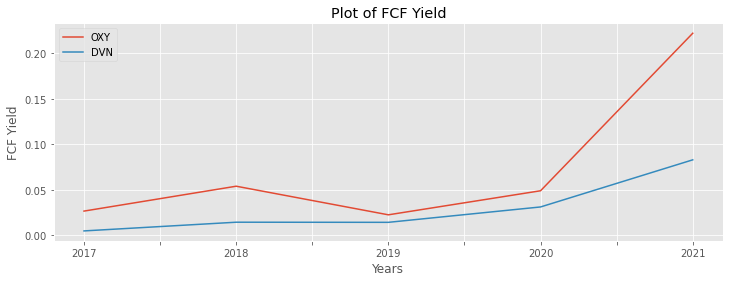

In [100]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['freeCashFlowYield',_years].plot(kind='line')
df_DVN.loc['freeCashFlowYield',_years].plot(kind='line')


plt.title('Plot of FCF Yield')
plt.ylabel('FCF Yield')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2 class="red-text" style="color: red;" > OXY wins (higher FCF Yield)</h2>

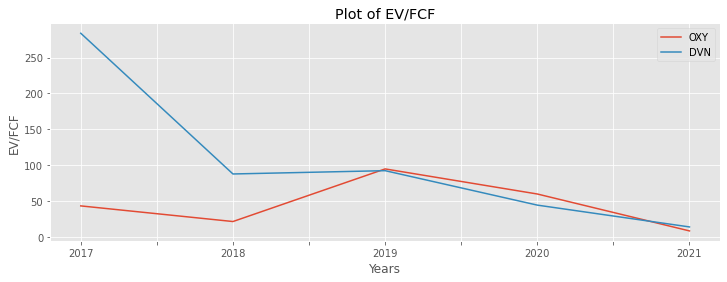

In [101]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['evToFreeCashFlow',_years].plot(kind='line')
df_DVN.loc['evToFreeCashFlow',_years].plot(kind='line')


plt.title('Plot of EV/FCF')
plt.ylabel('EV/FCF')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

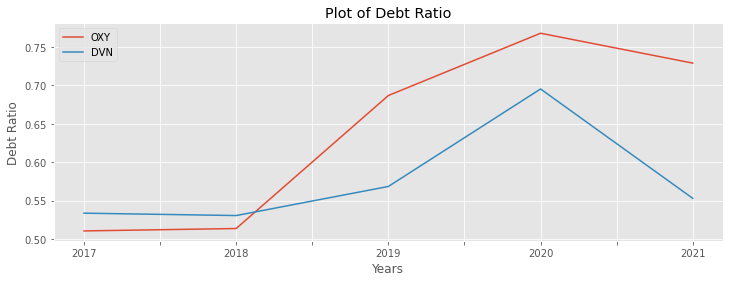

In [102]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['debtRatio',_years].plot(kind='line')
df_DVN.loc['debtRatio',_years].plot(kind='line')

#TotalLiabilities / TotalAssets  = TotalLiabilities / TotalEquity + TotalLiabilities
plt.title('Plot of Debt Ratio')
plt.ylabel('Debt Ratio')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2 class="blue-text" style="color: blue;" > DVN wins (less leveraged)</h2>

The current ratio is a liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year.

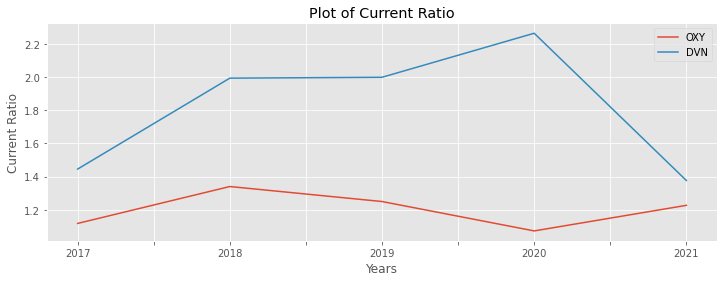

In [103]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['currentRatio',_years].plot(kind='line')
df_DVN.loc['currentRatio',_years].plot(kind='line')

#Current Assets / Current Liabilities
plt.title('Plot of Current Ratio')
plt.ylabel('Current Ratio')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2 class="blue-text" style="color: blue;" > DVN wins in pay shot-therm obligations</h2>

The interest coverage ratio is a debt and profitability ratio used to determine how easily a company can pay interest on its outstanding debt.

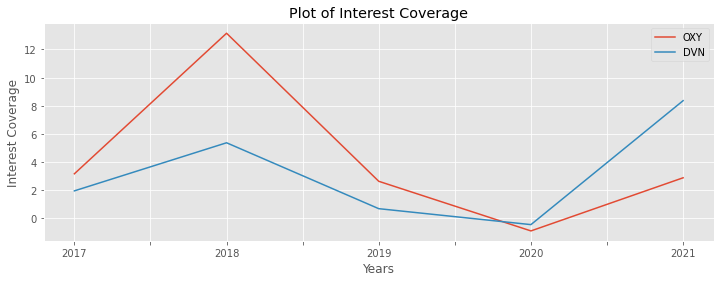

In [104]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['interestCoverage',_years].plot(kind='line')
df_DVN.loc['interestCoverage',_years].plot(kind='line')

#Interest coverage:the minimum acceptable is 2, Analysts prefer to see a coverage ratio of 3 or better (Investopedia)
plt.title('Plot of Interest Coverage')
plt.ylabel('Interest Coverage')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2 class="blue-text" style="color: blue;" > DVN wins in pay interests on its oustanding debt</h2>

In [127]:
CA_OXY  = [item / 1000000 for item in list(df_OXY.loc['totalCurrentAssets',_years])]

NonCA_OXY = [item / 1000000 for item in list(df_OXY.loc['totalNonCurrentAssets',_years])]

Equity_OXY = [item / 1000000 for item in list(df_OXY.loc['totalEquity',_years] )]

CL_OXY = [item / 1000000 for item in list(df_OXY.loc['totalCurrentLiabilities',_years])]

NonCL_OXY = [item / 1000000 for item in list(df_OXY.loc['totalNonCurrentLiabilities',_years])]



CA_DVN  = [item / 1000000 for item in list(df_DVN.loc['totalCurrentAssets',_years])]

NonCA_DVN = [item / 1000000 for item in list(df_DVN.loc['totalNonCurrentAssets',_years])]

Equity_DVN = [item / 1000000 for item in list(df_DVN.loc['totalEquity',_years] )]

CL_DVN = [item / 1000000 for item in list(df_DVN.loc['totalCurrentLiabilities',_years])]

NonCL_DVN = [item / 1000000 for item in list(df_DVN.loc['totalNonCurrentLiabilities',_years])]



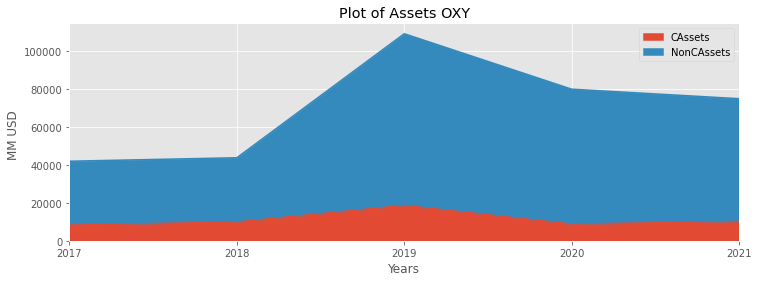

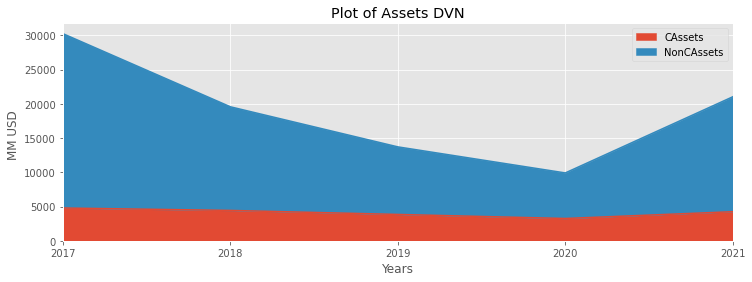

In [166]:
Assets_OXY = pd.DataFrame({

    'CAssets': CA_OXY,

    'NonCAssets': NonCA_OXY,

    
}, index=pd.date_range(start='2017/12/31', end='2021/12/31',

                       freq='Y'))

Assets_DVN = pd.DataFrame({

    'CAssets': CA_DVN,

    'NonCAssets': NonCA_DVN,

    
}, index=pd.date_range(start='2017/12/31', end='2021/12/31',

                       freq='Y'))



ax1 = Assets_OXY.plot(kind='area')
plt.title('Plot of Assets OXY')
plt.ylabel('MM USD ')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)

ax2 = Assets_DVN.plot(kind='area')

plt.title('Plot of Assets DVN')
plt.ylabel('MM USD ')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)


plt.show()

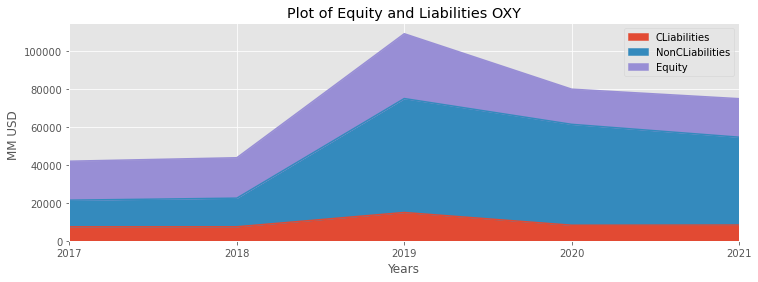

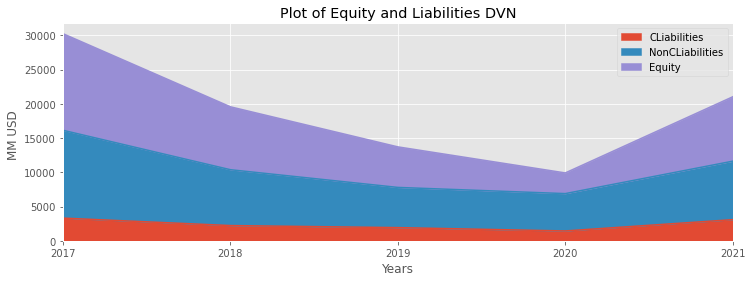

In [167]:
Eq_Liab_OXY = pd.DataFrame({

    'CLiabilities': CL_OXY,

    'NonCLiabilities': NonCL_OXY,
    
    'Equity': Equity_OXY

    
}, index=pd.date_range(start='2017/12/31', end='2021/12/31',

                       freq='Y'))


Eq_Liab_DVN = pd.DataFrame({

    'CLiabilities': CL_DVN,

    'NonCLiabilities': NonCL_DVN,
    
    'Equity': Equity_DVN

    
}, index=pd.date_range(start='2017/12/31', end='2021/12/31',

                       freq='Y'))


ax1 = Eq_Liab_OXY.plot(kind='area')

plt.title('Plot of Equity and Liabilities OXY')
plt.ylabel('MM USD ')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)

ax2 = Eq_Liab_DVN.plot(kind='area')

plt.title('Plot of Equity and Liabilities DVN')
plt.ylabel('MM USD ')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)


plt.show()

From my point of view OXY wins, OXY has 4 times more assets than DVN but at the same time they are more leveraged as seen in the figures above. Therefore, in a situation of rising interest rates, OXY could be in trouble. At the moment it is better because it generates enough cash to survive and oil prices are not expected to fall. 

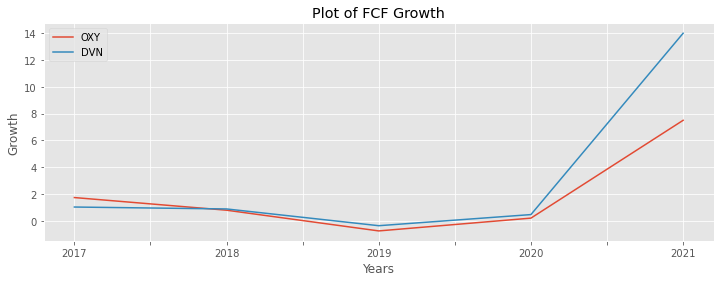

In [152]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['freeCashFlowGrowth',_years].plot(kind='line')
df_DVN.loc['freeCashFlowGrowth',_years].plot(kind='line')


plt.title('Plot of FCF Growth')
plt.ylabel('Growth')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

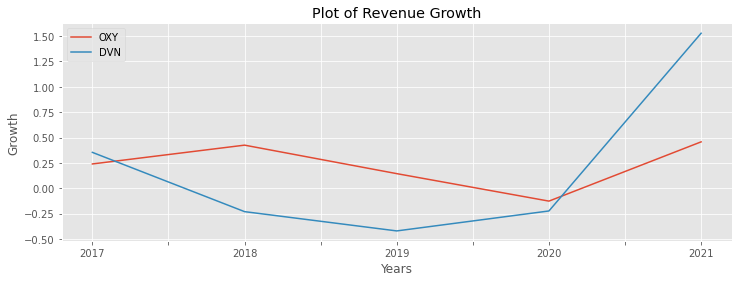

In [153]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['revenueGrowth',_years].plot(kind='line')
df_DVN.loc['revenueGrowth',_years].plot(kind='line')


plt.title('Plot of Revenue Growth')
plt.ylabel('Growth')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

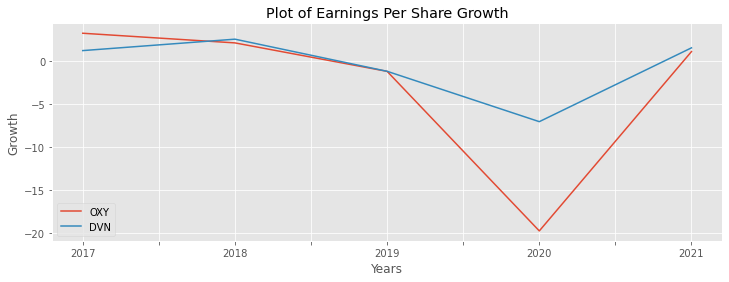

In [155]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['epsgrowth',_years].plot(kind='line')
df_DVN.loc['epsgrowth',_years].plot(kind='line')


plt.title('Plot of Earnings Per Share Growth')
plt.ylabel('Growth')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

DVN is growing faster than OXY in revenues and free cash flow, but OXY's revenues are twice as high now.

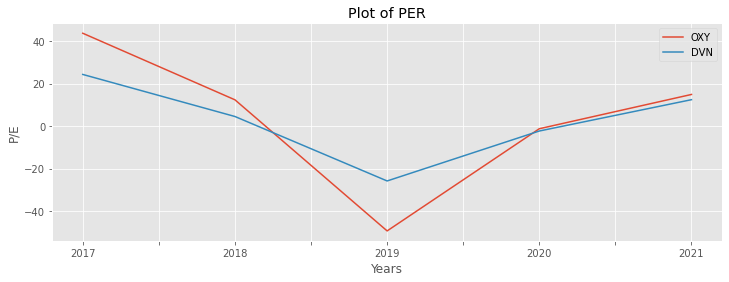

In [156]:

_years = list(map(str, range(2017, 2022)))

df_OXY.loc['peRatio',_years].plot(kind='line')
df_DVN.loc['peRatio',_years].plot(kind='line')


plt.title('Plot of PER')
plt.ylabel('P/E')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()


This figure is not accurate, as the share price has risen sharply since the beginning of the year. Currently, DVN has a PE of 13.88 compared to a PE of 22.22 for OXY.

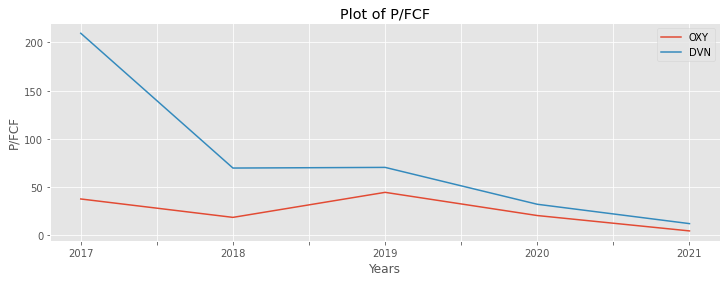

In [157]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['pfcfRatio',_years].plot(kind='line')
df_DVN.loc['pfcfRatio',_years].plot(kind='line')


plt.title('Plot of P/FCF')
plt.ylabel('P/FCF')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

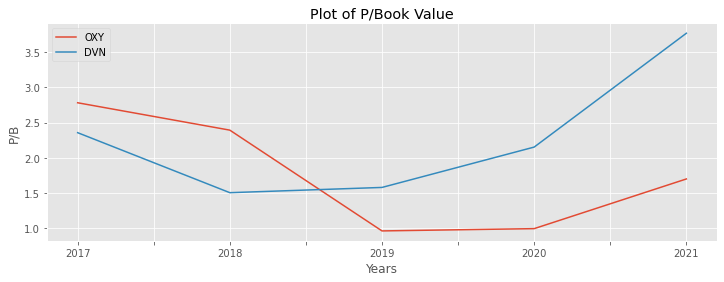

In [158]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['pbRatio',_years].plot(kind='line')
df_DVN.loc['pbRatio',_years].plot(kind='line')


plt.title('Plot of P/Book Value')
plt.ylabel('P/B')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

It seems that OXY is a more conservative investment here. This figure makes sense because OXY has more assets than DVN, so the Book Value is higher.

Investors mainly use a company's enterprise multiple to determine whether a company is undervalued or overvalued. A low ratio relative to peers or historical averages indicates that a company might be undervalued and a high ratio indicates that the company might be overvalued. 

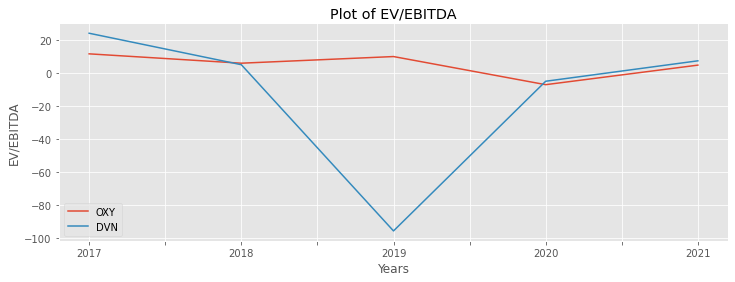

In [159]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['enterpriseValueMultiple',_years].plot(kind='line')
df_DVN.loc['enterpriseValueMultiple',_years].plot(kind='line')


plt.title('Plot of EV/EBITDA')
plt.ylabel('EV/EBITDA')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2 class="red-text" style="color: red;" > OXY wins. Currently, DVN has a EV/EBITDA of 8.05 compared to a EV/EBITDA of 5.96 for OXY. </h2>

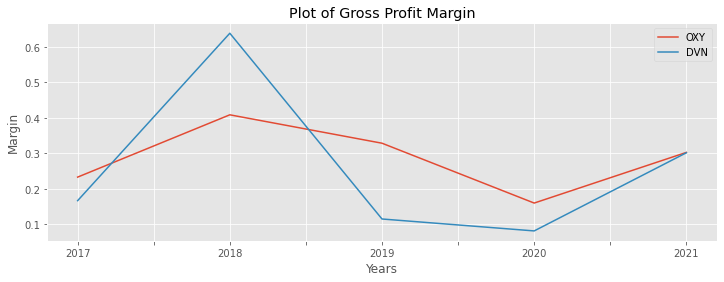

In [160]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['grossProfitMargin',_years].plot(kind='line')
df_DVN.loc['grossProfitMargin',_years].plot(kind='line')


plt.title('Plot of Gross Profit Margin')
plt.ylabel('Margin')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

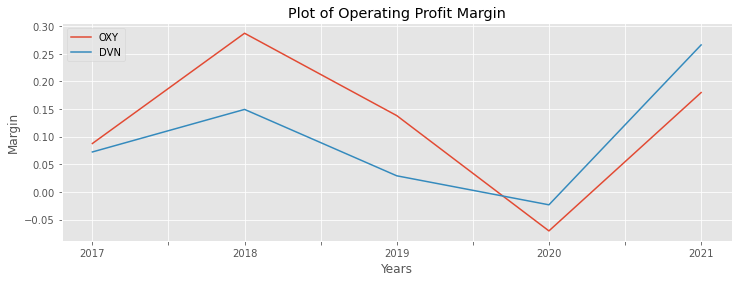

In [161]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['operatingProfitMargin',_years].plot(kind='line')
df_DVN.loc['operatingProfitMargin',_years].plot(kind='line')


plt.title('Plot of Operating Profit Margin')
plt.ylabel('Margin')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

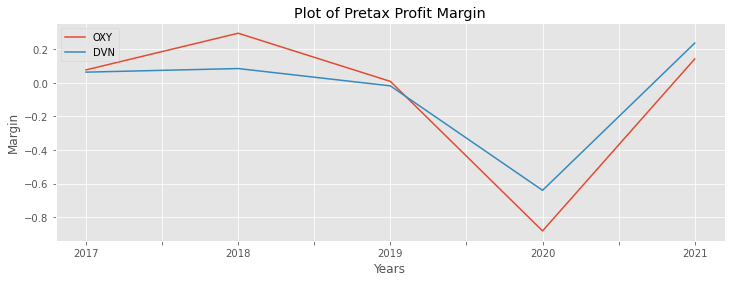

In [162]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['pretaxProfitMargin',_years].plot(kind='line')
df_DVN.loc['pretaxProfitMargin',_years].plot(kind='line')


plt.title('Plot of Pretax Profit Margin')
plt.ylabel('Margin')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

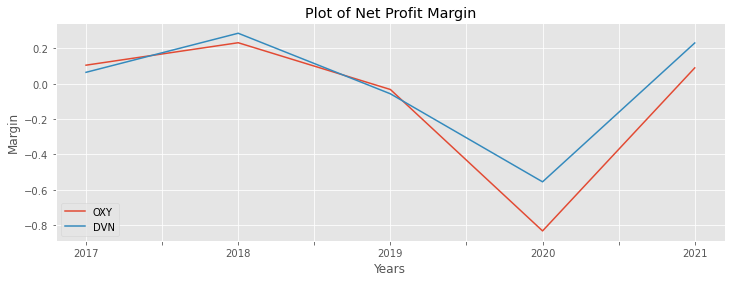

In [163]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['netProfitMargin',_years].plot(kind='line')
df_DVN.loc['netProfitMargin',_years].plot(kind='line')


plt.title('Plot of Net Profit Margin')
plt.ylabel('Margin')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

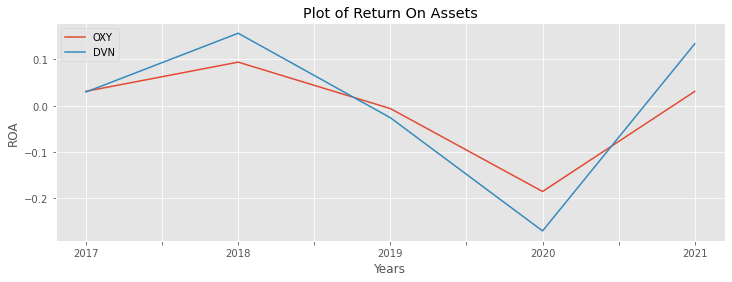

In [164]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['returnOnAssets',_years].plot(kind='line')
df_DVN.loc['returnOnAssets',_years].plot(kind='line')


plt.title('Plot of Return On Assets')
plt.ylabel('ROA')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

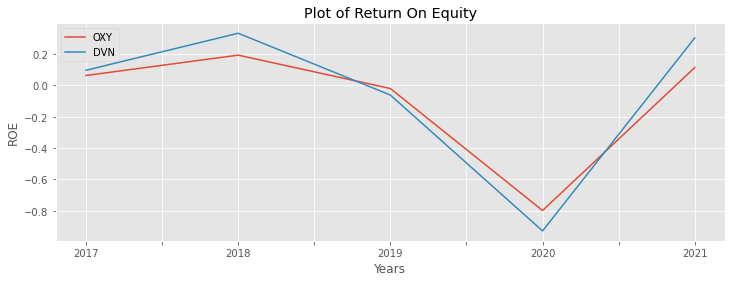

In [165]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['returnOnEquity',_years].plot(kind='line')
df_DVN.loc['returnOnEquity',_years].plot(kind='line')

plt.title('Plot of Return On Equity')
plt.ylabel('ROE')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

When a company generates negative earnings, or a net loss, and still pays a dividend, it has a negative payout ratio. A negative payout ratio of any size is typically a bad sign. It means the company had to use existing cash or raise additional money to pay the dividend.

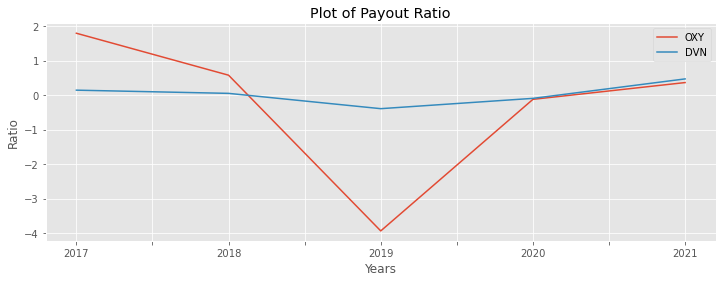

In [168]:

_years = list(map(str, range(2017, 2022)))

df_OXY.loc['payoutRatio',_years].plot(kind='line')
df_DVN.loc['payoutRatio',_years].plot(kind='line')

plt.title('Plot of Payout Ratio')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

The dividend yield is a financial ratio that tells you the percentage of a company's share price that it pays out in dividends each year

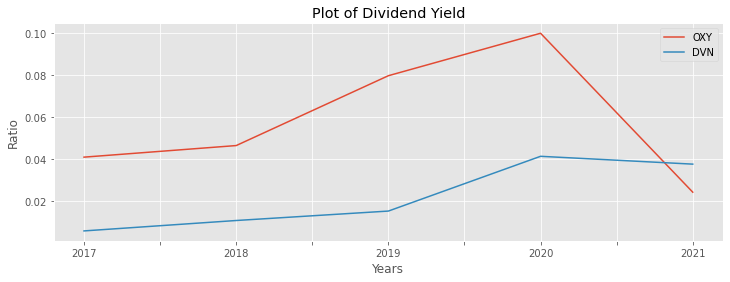

In [169]:
_years = list(map(str, range(2017, 2022)))

df_OXY.loc['dividendYield',_years].plot(kind='line')
df_DVN.loc['dividendYield',_years].plot(kind='line')

plt.title('Plot of Dividend Yield')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.rcParams["figure.figsize"] = (12,4)
plt.legend(['OXY','DVN'])
plt.show()

<h2>
    
<ul>   
    <li class="red-text" style="color: blue;">It looks like Devon Energy's management is better as they have better ROA and ROE. Devon Energy's margins are better as well, so it seems that Devon Energy's assets could be better than OXY's assets.</li>
    <li class="red-text" style="color: red;">On the other hand, the extraordinary situation is now, so it seems that Warren Buffet prefers companies that could produce high cash flows now.</li>

</ul>

</h2>

In [5]:

#Tickers of UK upstream independent oil and gas producers

#https://www2.deloitte.com/uk/en/pages/energy-and-resources/articles/uk-upstream-independents.html

bigger_similar_companies = ['HBR.L','ENOG.L','CNE.L','DEC.L','TLW.L','SQZ.L','PANR.L','INDI.L','JSE.L','GENL.L','ENQ.L','IOG.L','SAVE.L','I3E.L','HUR.L']

smaller_similar_companies = ['KIST.L','PGR.L','PHAR.L','ENW.L','CASP.L','JKX.L','TRIN.L','PMG.L','JOG.L','ADV.L']

<h1>Kistos</h1>

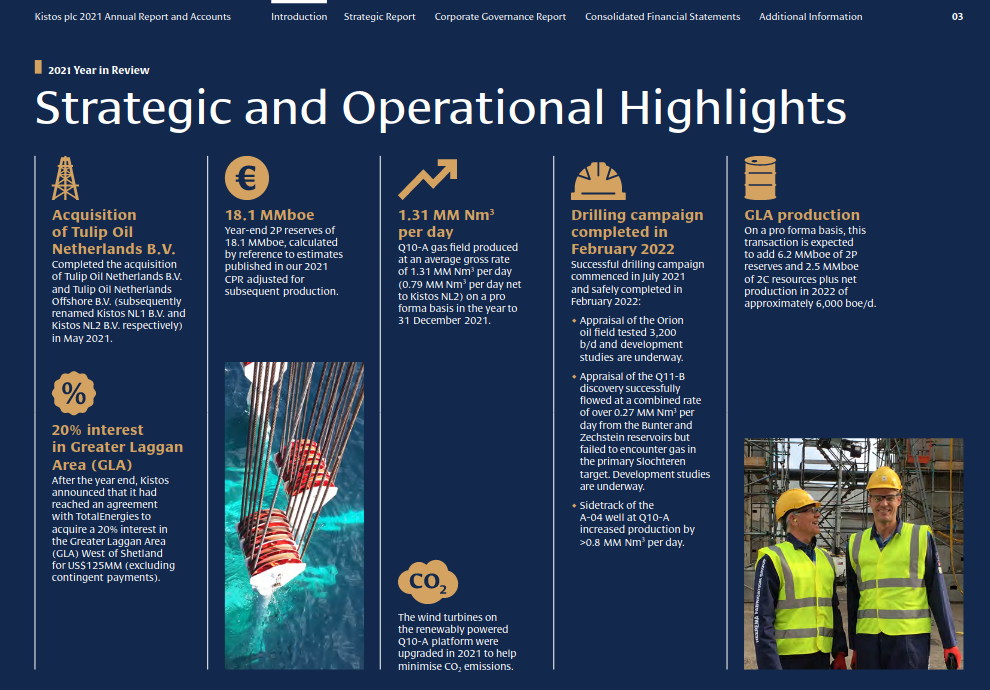

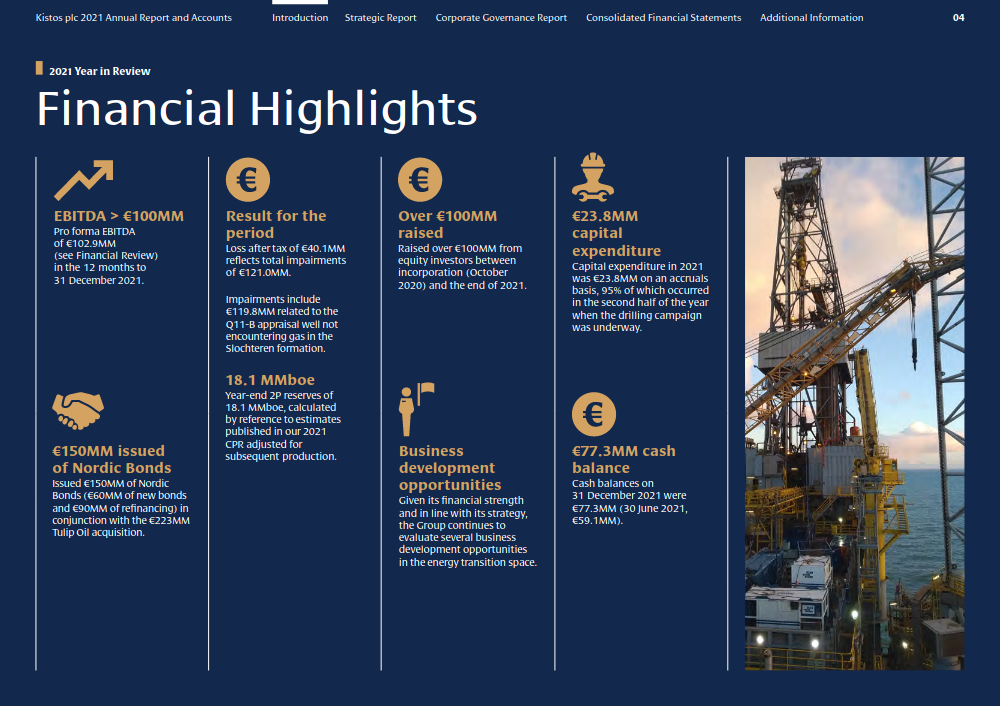

<h2>Kistos is a trading company that has been established with the objective of creating value for its investors through the acquisition and management of companies or businesses in the energy sector.</h2>

<ul>
    <li>100%+ FCF Yield, one of the most important things during this exceptional situation</li>
    <li>If interest rates rise, the company will be fine because it is not leveraged.</li>
    <li>Gas prices in Europe do not seem to be falling in the futures market. Next winter will be the key in Europe</li>
    <li>It seems that Russian oil is going to be banned in Europe</li>
    <li>Kistos' management is legendary.  </li>
    </ul>
    

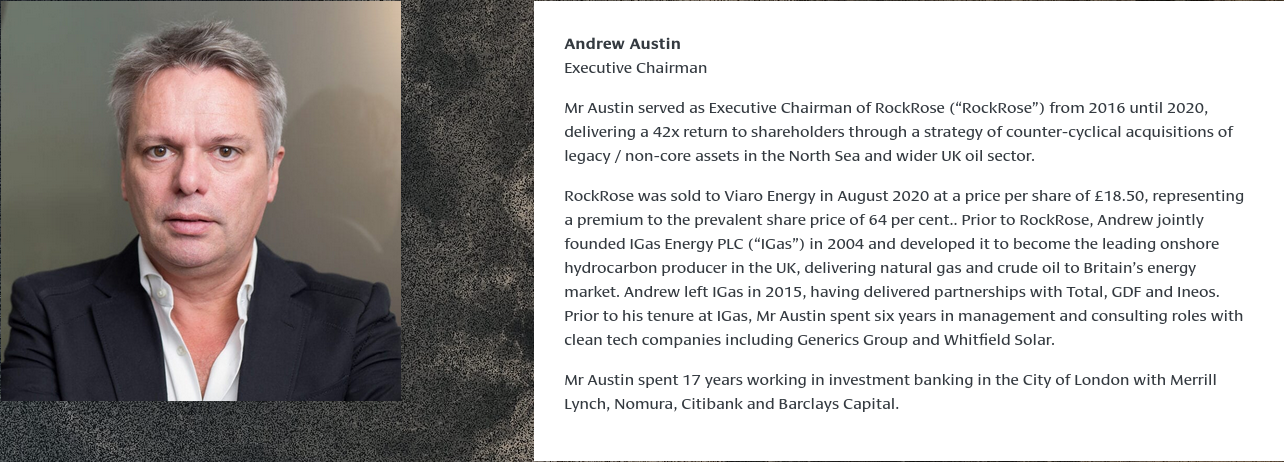

In [170]:
#EV/EBITDA KISTOS


##Inputs

shares = 82.864

price_gbx = 435 #gbx

gbp_to_eur = 1.21

price_eur_now = (price_gbx/100)*1.21

##Data annual report 2021


ebitda_2021 = 102.862

net_debt_2021 = 67.8

In [180]:
 print( '2021 EV/EBITDA : ' + str((price_eur_now*shares + net_debt_2021) / ebitda_2021) )   

2021 EV/EBITDA : 4.899327876183625


<h2> Estimates using EV/EBITDA </h2>

In [181]:
#Estimates EV/EBITDA from OXY and DVN, Examples of mature companies (6-8)

ev_ebitda_sector = 6

#Estimates market screener

ebitda_2022 = 371

net_debt_2022 = 0

In [187]:
price_estimated_2022_eur_ev_ebitda = ( ev_ebitda_sector*ebitda_2022 - net_debt_2022 )/ shares

print( 'Price estimated EV/EBITDA : ' + str(price_estimated_2022_eur_ev_ebitda))

Price estimated EV/EBITDA : 26.86329407221471


<h2> Estimates using EV/FCF </h2>

In [184]:
ev_fcf_sector = 10 

#Estimates market screener

fcf_2022 = 216

net_debt_2022 = 0

In [189]:
price_estimated_2022_eur_ev_fcf = (ev_fcf_sector*fcf_2022 + net_debt_2022)/shares

print( 'Price estimated FCF : ' + str(price_estimated_2022_eur_ev_fcf)  )

Price estimated FCF : 26.066808264143656


<h1> Projected growth 2022 </h1>

In [190]:
  print( 'CAGR_EV/EBITDA : ' + str(((price_estimated_2022_eur_ev_ebitda - price_eur_now) / price_eur_now ) *100) + '%' )

CAGR_EV/EBITDA : 410.36941336021107%


In [191]:
print( 'CAGR_EV/FCF : ' + str(((price_estimated_2022_eur_ev_fcf - price_eur_now) / price_eur_now ) *100) + '%' )

CAGR_EV/FCF : 395.2371666029003%
